In [1]:
import matplotlib.pyplot as plt
import numpy as np

$\text{Метод эйлера: }$  <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e668e4e58dd7ff4206af64d6320f3f3d95f5aa92" class="mwe-math-fallback-image-inline" aria-hidden="true" style="vertical-align: -0.838ex; width:28.617ex; height:2.843ex;" alt=" y_i = y_{i-1} + h f(x_{i-1}, y_{i-1}). \quad">

In [29]:
h = 0.1
n = 6
xi = np.cumsum([h] * n)
function = lambda x, y: (3 * (x**2)) / (x**3 + y + 1) 
exact_solution = lambda x: -x**3 - 2

In [30]:
def Euler(transfer_function, x0 = 0, y0 = -2):
    x = x0
    yi = []
    for i in range(n):
        y0 = y0 + h * transfer_function(x, y0)
        x = x + h
        yi.append(y0)
    return yi 

In [31]:
#Euler(function) - exact_solution(xi)

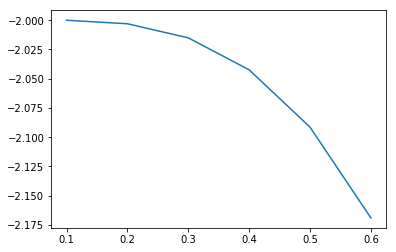

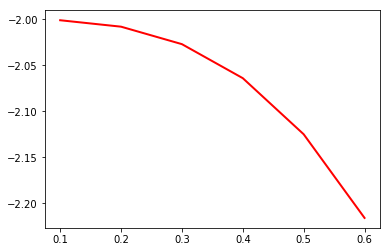

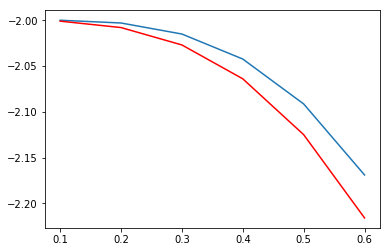

In [34]:
plt.plot(xi, Euler(function))
plt.show()    
plt.plot(xi, exact_solution(xi), color='red', linewidth=2)
plt.show()
plt.plot(xi, Euler(function)) 
plt.plot(xi, exact_solution(xi), color='red')

$\text{Модифицированный метод Эйлера второго порядка точности: }$ <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e1ee988af6b29d4f7f08660b2ac06a7068753a10">

In [35]:
def Euler2(function, x = 0, y0 = -2):
    y = y0
    yi = []
    for i in range(n):
        y0 += h * function(x, y0)
        y += h * (function(x, y) + function(x + h, y0) ) / 2
        x += h
        yi.append(y)
    return yi 

In [36]:
#Euler2(function) - exact_solution(xi)

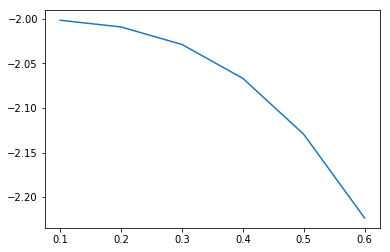

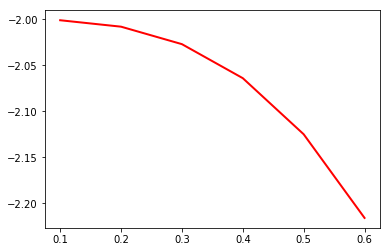

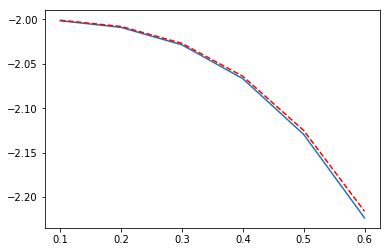

In [37]:
plt.plot(xi, Euler2(function))
plt.show()
plt.plot(xi, exact_solution(xi), color='red', linewidth=2)
plt.show()
plt.plot(xi, Euler2(function))
plt.plot(xi, exact_solution(xi), color='red', linestyle='dashed')

$ \text{ Метод Рунге-Кутты:  } $ <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/69154de8cfe616c86675c6eb01f90d67f577252d" > 

$\text{Где, }$ <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/120b207ca055bd888933127f5d9e906133580f50">$$\$$ <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/9c91ca156e16bc16fbcc6caf07b7e450e417539b"> 

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/d9a0abc4b82c32f99b14f1003c5adbb27934bdad"> $$\$$ <img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/b2afedb0fa23665b955213f7ff81f680ad97b091">

In [38]:
k1 = lambda x, y: function(x,y)     
k2 = lambda k1, x, y, h: function(x + h/2 , y + (h*k1) / 2) 
k3 = lambda k2, x, y, h: function(x + h/2 , y + (h*k2) / 2)    
k4 = lambda k3, x, y, h: function(x + h, y + h * k3)           

def Euler4(function, x = 0, y0 = -2):
    y = y0
    yi = []
    for i in range(n):
        k_1 = k1(x, y)
        k_2 = k2(k_1, x, y, h)
        k_3 = k3(k_2, x, y, h)
        k_4 = k4(k_3, x, y, h)
        y = y + h * (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
        x = x + h
        yi.append(y)
    return yi 

In [39]:
#Euler4(function) - exact_solution(xi)

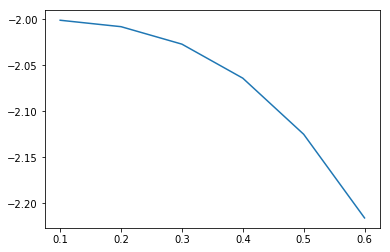

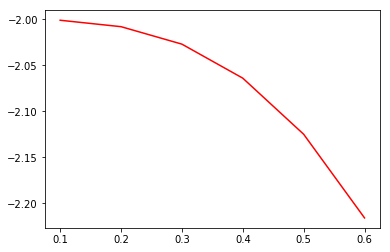

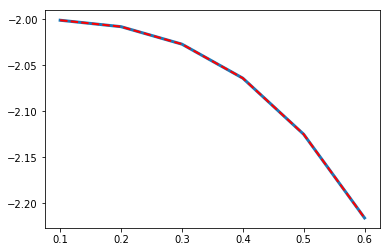

In [52]:
plt.plot(xi, Euler4(function = function))
plt.show()
plt.plot(xi, exact_solution(xi), color='red')
plt.show()
plt.plot(xi, Euler4(function = function), linewidth=3)
plt.plot(xi, exact_solution(xi), color='red', linewidth=2, linestyle='dashed')